In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import io

def show (img):
    io.imshow(img)
    plt.show()

def showLog (img):
    io.imshow(np.log(img))
    plt.show()

In [12]:
import sys
TD1AbsolutePath = "../TP1/"
sys.path.append(TD1AbsolutePath)

import PSpy
import WhiteICA
import numpy as np


inputDirectory = "../img/"
resultsDirectory = "./res/"
resultsTD1Directory = "../TP1/res/"

averagePSResultsFileName = resultsTD1Directory + "averagePS.hdf5"

whiteningFiltersFigureFileName = resultsDirectory + "whiteningFilters.png"
whiteningFiltersResultsFileName = resultsDirectory + "whiteningFilters.hdf5"

averagePS1FigureFileName = resultsDirectory +"averagePS1.png"
averagePS4FigureFileName = resultsDirectory +"averagePS4.png"

averagePS1ResultsFileName = resultsDirectory +"averagePS1.hdf5"
averagePS4ResultsFileName = resultsDirectory +"averagePS4.hdf5"

averagePS1RadialResultsFileName = resultsDirectory + "averagePS1Radial.hdf5"
averagePS4RadialResultsFileName = resultsDirectory + "averagePS4Radial.hdf5"

averagePS1RadialFigureFileName = resultsDirectory + "averagePS1Radial.png"
averagePS4RadialFigureFileName = resultsDirectory + "averagePS4Radial.png"

ICResultsFileName = resultsDirectory +  "IC.hdf5"
ICFigureFileName = resultsDirectory + "IC.png"

sampleSize = [64, 64]
ICASampleSize = [12, 12]
ICANSamples = 50000

In [3]:
averagePS = PSpy.readH5(averagePSResultsFileName, 'averagePS')
maxPS = np.max(averagePS)

In [4]:
noiseVarianceList = [maxPS*10**(-9), maxPS*10**(-8), maxPS*10**(-7), maxPS*10**(-6)]

In [5]:
whiteningFilters = []
for noiseVariance in noiseVarianceList:
    whiteningFilters.append(WhiteICA.getPowerSpectrumWhiteningFilter(averagePS, noiseVariance))

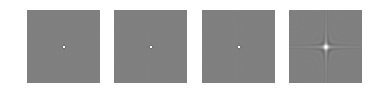

In [6]:
PSpy.saveH5(whiteningFiltersResultsFileName, 'whiteningFilters', np.array(whiteningFilters))
WhiteICA.makeWhiteningFiltersFigure(whiteningFilters, whiteningFiltersFigureFileName)

In [7]:
whiteningFilter = whiteningFilters[1];
averagePS1 = WhiteICA.getAveragePSWhitenImages(inputDirectory, sampleSize, whiteningFilter)

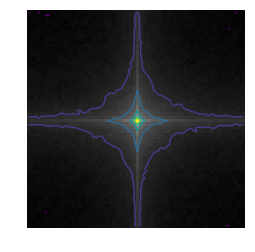

In [8]:
PSpy.saveH5(averagePS1ResultsFileName, 'averagePS', averagePS1)
PSpy.makeAveragePSFigure(averagePS1, averagePS1FigureFileName)

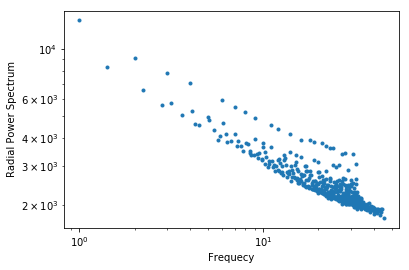

In [9]:
averagePS1Radial = PSpy.getRadialPS(averagePS1)
radialFreq = PSpy.getRadialFreq(averagePS1.shape)
PSpy.saveH5(averagePS1RadialResultsFileName, 'averagePSRadial', averagePS1Radial)
PSpy.makeAveragePSRadialFigure(radialFreq, averagePS1Radial, averagePS1RadialFigureFileName)

In [13]:
X = WhiteICA.getICAInputData(inputDirectory, ICASampleSize, ICANSamples)
X = WhiteICA.preprocess(X);
C = WhiteICA.getIC(X)

../img/image535.png
../img/image489.png
../img/image185.png
../img/image92.png
../img/image154.png
../img/image36.png
../img/image222.png
../img/image184.png
../img/image16.png
../img/image369.png
../img/image228.png
../img/image479.png
../img/image373.png
../img/image530.png
../img/image416.png
../img/image511.png
../img/image570.png
../img/image216.png
../img/image400.png
../img/image591.png
../img/image494.png
../img/image548.png
../img/image264.png
../img/image242.png
../img/image92.png
../img/image27.png
../img/image353.png
../img/image428.png
../img/image172.png
../img/image336.png
../img/image211.png
../img/image384.png
../img/image357.png
../img/image488.png
../img/image76.png
../img/image256.png
../img/image274.png
../img/image602.png
../img/image536.png
../img/image232.png
../img/image32.png
../img/image101.png
../img/image174.png
../img/image97.png
../img/image251.png
../img/image304.png
../img/image549.png
../img/image178.png
../img/image13.png
../img/image65.png
../img/ima

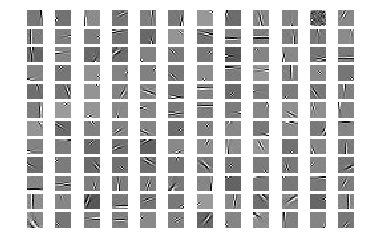

In [14]:
PSpy.saveH5(ICResultsFileName, 'IC', C)
WhiteICA.makeIdependentComponentsFigure(C, ICASampleSize, ICFigureFileName)